In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data form task one and Two

In [79]:
df_trans = pd.read_csv("C:\\Users\\Aman\\Desktop\\kifyaw1\\yfinance_data\\transformed_raw.csv")
df_amzn = pd.read_csv("C:\\Users\\Aman\\Desktop\\kifyaw1\\yfinance_data\\AMZN_historical_data.csv")

In [71]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1407328 non-null  int64  
 1   headline         1407328 non-null  object 
 2   url              1407328 non-null  object 
 3   publisher        1407328 non-null  object 
 4   date             1407328 non-null  object 
 5   stock            1407328 non-null  object 
 6   datetime         1407328 non-null  object 
 7   sentiment_score  1407328 non-null  float64
 8   sentiment        1407328 non-null  object 
 9   tokens           1407328 non-null  object 
 10  topic            1407328 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 118.1+ MB


taking only necessary features from the transformed data

In [80]:
df_trans = df_trans[['stock', 'date', 'sentiment_score', 'topic']]

changing the dataframes to date time data type 

In [90]:
df_trans['Date'] = pd.to_datetime(df_trans['date'], format='ISO8601').dt.tz_localize(None)
# df_trans['Date'] = pd.to_datetime(df_trans['date'], format='ISO8601').dt.normalize()
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'], format='ISO8601').dt.tz_localize(None)



# changing the date ranges to the same range 
min = df_trans['Date'].min()
max = df_trans['Date'].max()
df_amzn = df_amzn[(df_amzn['Date'] >= min) & (df_amzn['Date'] <= max)]

# extracting only apple data form df_trans
df_trans_amzn = df_trans[df_trans['stock'] == 'AMZN'].reset_index()
df_trans_amzn.drop('index', axis=1, inplace=True)
df_trans_amzn.drop('stock', axis=1, inplace=True)
df_trans_amzn.head()

,date,sentiment_score,topic,Date
0,2020-06-10 13:18:50-04:00,0.1779,0,2020-06-10 13:18:50
1,2020-06-10 11:33:26-04:00,0.5574,2,2020-06-10 11:33:26
2,2020-06-10 07:53:47-04:00,0.2023,0,2020-06-10 07:53:47
3,2020-06-10 07:20:03-04:00,0.6486,0,2020-06-10 07:20:03
4,2020-06-10 00:52:01-04:00,0.0516,0,2020-06-10 00:52:01


In [95]:
df_trans_amzn.drop('date', axis=1, inplace=True)

In [112]:
df_amzn['week'] = df_amzn['Date'].dt.isocalendar().week
df_trans_amzn['week'] = df_trans_amzn['Date'].dt.isocalendar().week

weekly_amzn = df_amzn.groupby('week').mean().reset_index()
weekly_trans_amzn = df_trans_amzn.groupby('week').mean().reset_index()

In [113]:
df_merged = pd.merge(weekly_amzn, weekly_trans_amzn, on='week', how='outer')

In [114]:
# handling missing values
df_merged['sentiment_score'].fillna(df_merged['sentiment_score'].mean(), inplace=True)
df_merged['topic'].fillna(df_merged['topic'].mean(), inplace=True)
df_merged.drop(['Date_x', 'Date_y'], axis= 1, inplace= True)

C:\Users\Aman\AppData\Local\Temp\ipykernel_15216\449469284.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['sentiment_score'].fillna(df_merged['sentiment_score'].mean(), inplace=True)
C:\Users\Aman\AppData\Local\Temp\ipykernel_15216\449469284.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [116]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   week             53 non-null     UInt32 
 1   Open             53 non-null     float64
 2   High             53 non-null     float64
 3   Low              53 non-null     float64
 4   Close            53 non-null     float64
 5   Adj Close        53 non-null     float64
 6   Volume           53 non-null     float64
 7   Dividends        53 non-null     float64
 8   Stock Splits     53 non-null     float64
 9   sentiment_score  53 non-null     float64
 10  topic            53 non-null     float64
dtypes: UInt32(1), float64(10)
memory usage: 4.5 KB


In [122]:
corr_matrix = df_merged.drop(['Dividends', 'Stock Splits'], axis=1).corr()

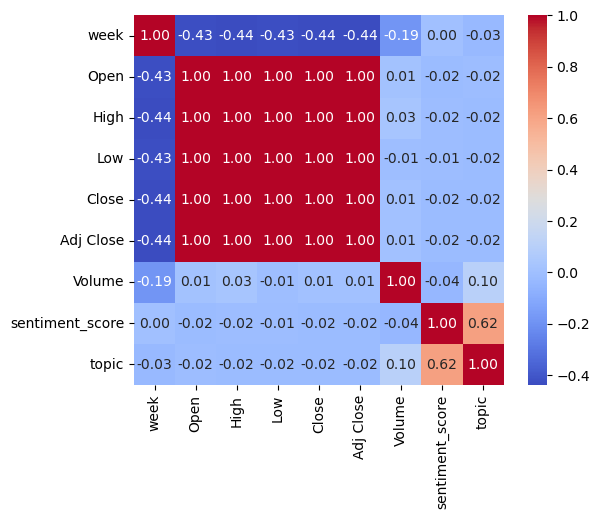

In [121]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.show()

**Calculate Daily Stock Returns**

In [124]:
df_merged['Daily Return'] = df_merged['Close'].pct_change()

In [126]:
correlation = df_merged[['sentiment_score', 'Daily Return']].corr()
correlation 

,sentiment_score,Daily Return
sentiment_score,1.000000,-0.028241
Daily Return,-0.028241,1.000000


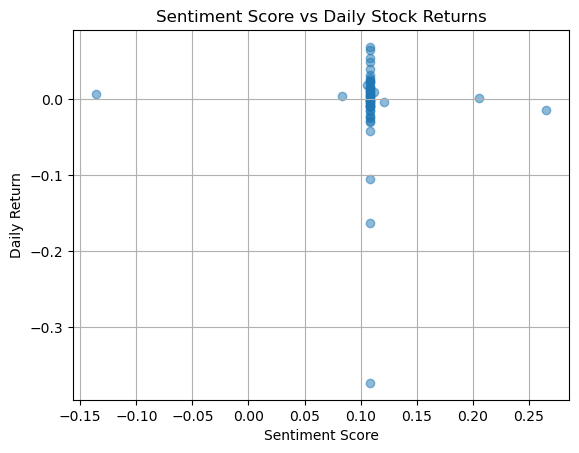

In [127]:
plt.scatter(df_merged['sentiment_score'], df_merged['Daily Return'], alpha=0.5)
plt.title('Sentiment Score vs Daily Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()